In [4]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
#a = []
#while(1):
#    a.append('1')

#Reading train and test files

In [0]:
test=pd.read_csv("/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/test_KaymcHn.csv")
train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/train_jqd04QH.csv')

In [87]:
test.shape

(15021, 13)

In [88]:
train.shape

(18359, 14)

In [89]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [90]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


#combining train and test together for cleaning

In [0]:
train['train/test']=1
test['train/test']=0


In [0]:
df=pd.concat([train,test],axis=0)

In [93]:
print(train.shape)
print(test.shape)
print(df.shape)

(18359, 15)
(15021, 14)
(33380, 15)


In [94]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,train/test
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0.0,1
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0.0,1
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0.0,1
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0.0,1
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1.0,1


##Checking Missing values

In [95]:
df.isnull().sum()

enrollee_id                   0
city                          0
city_development_index        0
gender                     7486
relevent_experience           0
enrolled_university         621
education_level             852
major_discipline           5231
experience                  103
company_size               8830
company_type               9369
last_new_job                671
training_hours                0
target                    15021
train/test                    0
dtype: int64

In [96]:
df.isnull().sum()*100/df.shape[0]

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    22.426603
relevent_experience        0.000000
enrolled_university        1.860395
education_level            2.552427
major_discipline          15.671061
experience                 0.308568
company_size              26.452966
company_type              28.067705
last_new_job               2.010186
training_hours             0.000000
target                    45.000000
train/test                 0.000000
dtype: float64

In [0]:
#checking unique values

##Checking Missing values

In [0]:
col_name=df.columns

In [99]:
for i in col_name:
  print(i)
  print(df[i].nunique())
  print()

enrollee_id
33380

city
123

city_development_index
93

gender
3

relevent_experience
2

enrolled_university
3

education_level
5

major_discipline
6

experience
22

company_size
8

company_type
6

last_new_job
6

training_hours
241

target
2

train/test
2



In [100]:
df['company_type'].value_counts(normalize=True)*100

Pvt Ltd                75.440423
Funded Startup          7.829745
Public Sector           7.463246
Early Stage Startup     4.285536
NGO                     4.052309
Other                   0.928741
Name: company_type, dtype: float64

In [0]:
miss_value=['company_size','company_type','education_level','enrolled_university','experience','gender','last_new_job','major_discipline']

In [102]:
for i in miss_value:
    print(i)
    print("missing value is ",df[i].isnull().sum()*100/df.shape[0],"percentage" )
    print(df[i].value_counts(normalize=True)*100)
    print('***********'.center(70))
    print()

company_size
missing value is  26.45296584781306 percentage
50-99        23.205703
100-500      19.735234
10000+       14.932790
10/49        10.851324
1000-4999    10.236253
<10          10.036660
500-999       6.676171
5000-9999     4.325866
Name: company_size, dtype: float64
                             ***********                              

company_type
missing value is  28.06770521270222 percentage
Pvt Ltd                75.440423
Funded Startup          7.829745
Public Sector           7.463246
Early Stage Startup     4.285536
NGO                     4.052309
Other                   0.928741
Name: company_type, dtype: float64
                             ***********                              

education_level
missing value is  2.5524266027561415 percentage
Graduate          59.985243
Masters           23.970118
High School       11.399410
Phd                2.708436
Primary School     1.936793
Name: education_level, dtype: float64
                             ***********  

#inference:
    1) missing value in variable company_type is 28%, but 75% of the class is pvt ltd. hencce, we can impute using that class.
    2) missing value in variable education_level is only 2.5%, and 60% of the class is graduate. hencce, we can impute using that class.
    3) missing value in variable enrolled_university is only 1.86%, but 76% of the class is no_enrollment. hencce, we can impute using that class.
    4) missing value in variable experience is only 0.3%, hence missing value can be imputed using median.
    5) missing value in variable gender is 22%, but 90% of the class is male. hencce, we can impute using that class.
         note: gender type 'gender'
    6)missing value in variable last_new_job is only 2%,  hencce, we can impute using median
    7) missing value in variable major_discipline is 16%, but 88% of the class is STEM . hencce, we can impute using that class.
    
    
    imp:
    missing value in variable company_size is 26.5% and distribution of the class in the variable is balanced in nature. 

In [0]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

In [0]:
df[['company_type','education_level','enrolled_university','gender','major_discipline','last_new_job']]=imputer.fit_transform(df[['company_type','education_level','enrolled_university','gender','major_discipline','last_new_job']])


## Converting experience into numerical to impute with median

In [0]:
df['experience']=df['experience'].replace({'>20':'21'})
df['experience']=df['experience'].replace({'<1':'0.5'})
df['experience']=df['experience'].astype('float64')

In [0]:
from sklearn.impute import SimpleImputer
imputer1=SimpleImputer(missing_values=np.nan,strategy="median")
x=df['experience'].values.reshape(-1,1)
df['experience']=imputer1.fit_transform(x)

In [0]:
#filling target column to avoid error.
df['target']=df['target'].fillna(value=1)

In [0]:
df_pps=df.copy()

#converting categorical into dummies and label encoded. numerical values are standardized

In [0]:
df_num=df[['city_development_index','experience','training_hours','train/test']]
df_cat_dum=df[['city','gender','relevent_experience','relevent_experience','enrolled_university','major_discipline','company_type','last_new_job']]
df_cat_labEnc=df[['education_level']]

In [0]:
df1=pd.get_dummies(data=df,columns=['city','gender','relevent_experience','relevent_experience','enrolled_university','major_discipline','company_type','last_new_job'],drop_first=True)

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['education_level']=le.fit_transform(df1['education_level'])

In [0]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

df1[['city_development_index','experience','training_hours']]=ss.fit_transform(df1[['city_development_index','experience','training_hours']])

In [113]:
df1.head()


,enrollee_id,city_development_index,education_level,experience,company_size,training_hours,target,train/test,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,...,city_city_76,city_city_77,city_city_78,city_city_79,city_city_8,city_city_80,city_city_81,city_city_82,city_city_83,city_city_84,city_city_89,city_city_9,city_city_90,city_city_91,city_city_93,city_city_94,city_city_97,city_city_98,city_city_99,gender_Male,gender_Other,relevent_experience_No relevent experience,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,23798,-1.436152,0,-1.119551,100-500,0.669857,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,29166,0.691696,0,0.507090,<10,0.056895,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,46,0.573482,0,-0.675921,50-99,-1.019929,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,18527,-1.645300,0,0.507090,50-99,-0.655465,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,21751,0.364335,2,-0.380168,NaN,0.371660,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0


In [0]:
#imputing company_size variable


In [0]:
df1['company_size']=df1['company_size'].replace({'50-99':1})
df1['company_size']=df1['company_size'].replace({'100-500':2})
df1['company_size']=df1['company_size'].replace({'10000+':3})
df1['company_size']=df1['company_size'].replace({'10/49':4})
df1['company_size']=df1['company_size'].replace({'1000-4999':5})
df1['company_size']=df1['company_size'].replace({'<10':6})
df1['company_size']=df1['company_size'].replace({'500-999':7})
df1['company_size']=df1['company_size'].replace({'5000-9999':8})

In [0]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=100,weights='distance')
temp=df1['company_size'].values.reshape(-1,1)

df1['company_size']=imputer.fit_transform(temp)

#checking predictive power score

In [116]:
df_pps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33380 entries, 0 to 15020
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             33380 non-null  int64  
 1   city                    33380 non-null  object 
 2   city_development_index  33380 non-null  float64
 3   gender                  33380 non-null  object 
 4   relevent_experience     33380 non-null  object 
 5   enrolled_university     33380 non-null  object 
 6   education_level         33380 non-null  object 
 7   major_discipline        33380 non-null  object 
 8   experience              33380 non-null  float64
 9   company_size            24550 non-null  object 
 10  company_type            33380 non-null  object 
 11  last_new_job            33380 non-null  object 
 12  training_hours          33380 non-null  int64  
 13  target                  33380 non-null  float64
 14  train/test              33380 non-null

In [0]:
df_pps['company_size']=df1['company_size']


In [118]:
df_pps.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
train/test                0
dtype: int64

In [119]:
pip install ppscore

  Created wheel for ppscore: filename=ppscore-0.0.2-py2.py3-none-any.whl size=9629 sha256=708a60043c54ac3c6c5e3d933d697acccbbba98f3fce14c88239c81abf7f8e85
  Stored in directory: /root/.cache/pip/wheels/29/32/a2/82782fc09f5cd68e401ff047201d38af8965fb94984db18aa5
Successfully built ppscore


In [0]:
tr=df_pps[df_pps['train/test']==1]
y_tr=tr['target']
x_tr=tr.drop(columns=['target','train/test','enrollee_id'],axis=1)

In [121]:
x_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18359 entries, 0 to 18358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    18359 non-null  object 
 1   city_development_index  18359 non-null  float64
 2   gender                  18359 non-null  object 
 3   relevent_experience     18359 non-null  object 
 4   enrolled_university     18359 non-null  object 
 5   education_level         18359 non-null  object 
 6   major_discipline        18359 non-null  object 
 7   experience              18359 non-null  float64
 8   company_size            18359 non-null  float64
 9   company_type            18359 non-null  object 
 10  last_new_job            18359 non-null  object 
 11  training_hours          18359 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 1.8+ MB


In [0]:
try_df=tr[['city_development_index','experience','company_size','training_hours','city','gender','target','education_level','major_discipline','company_type','last_new_job']]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
try_df['last_new_job']=le.fit_transform(try_df['last_new_job'])
x=try_df[['city_development_index','experience','company_size','training_hours','city','gender','education_level','major_discipline','company_type','last_new_job']]
y=try_df['target']
import ppscore as pps
#pps.score(try_df,x,y)

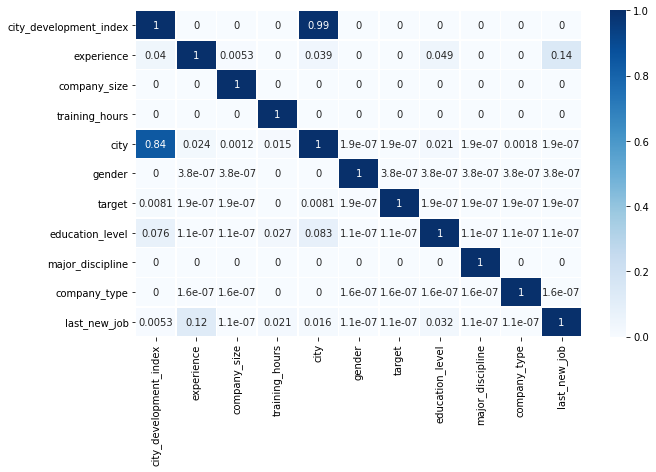

In [123]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
df_matrix = pps.matrix(try_df)
plt.figure(figsize=(10,6))
sns.heatmap(df_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
import warnings
warnings.filterwarnings('ignore')

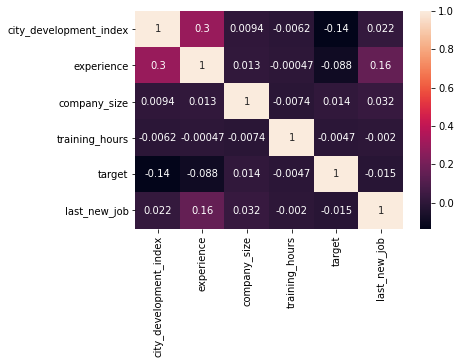

In [124]:
sns.heatmap(try_df.corr(),annot=True)
plt.show()

#inference:


1) there is a good correlation between 'experience' and 'city_development_index' (correlation value)
2) 'city' can predict 'city_development_index' from pps score which seems logical. we can reduce the variable count here by taking this logic into account.
3) but, among 'city' and 'city_development_index', 'city_development_index' is a better predictor of target.
4) 'gender' has nothing to offer towards target or other variables.
5) descent correlation value between 'last_new_job' and 'experience'
6) 'last_new_job' is a good predictor of  'experience'.



In [125]:
tr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,train/test
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3.0,2.000000,Pvt Ltd,1,106,0.0,1
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,6.000000,Funded Startup,1,69,0.0,1
2,46,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,6.0,1.000000,Public Sector,2,4,0.0,1
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,1.000000,Pvt Ltd,1,26,0.0,1
4,21751,city_100,0.887,Male,No relevent experience,no_enrollment,Masters,STEM,8.0,3.436212,Pvt Ltd,2,88,1.0,1


#Base Model

In [127]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33380 entries, 0 to 15020
Columns: 151 entries, enrollee_id to last_new_job_never
dtypes: float64(5), int64(3), uint8(143)
memory usage: 6.8 MB


In [132]:
train1=df1[df['train/test']==1]
test1=df1[df1['train/test']==0]

train=train1.drop(columns=['enrollee_id','train/test'])
test=test1.drop(columns=['enrollee_id','train/test','target'])

print(train.shape)
print(test.shape)

(18359, 149)
(15021, 148)


In [133]:
y_train=train['target']
x_train=train.drop(columns=['target'])
x_test=test

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)


(18359, 148)
(18359,)
(15021, 148)


In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

lr=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC(probability=True)
rf=RandomForestClassifier()
nb=GaussianNB()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()

models=[]

models.append(('lr',lr))
models.append(('knn',knn))
models.append(('svm',svm))
models.append(('rf',rf))
models.append(('nb',nb))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))

results=[]
names=[]
count=0
model_result=pd.DataFrame(columns=['Description','accuracy-train','roc-train',
                                       'recall-train','f1-score-train'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_prob_train=model.predict_proba(x_train)[:,1]
    y_pred_test=model.predict(x_test)
    y_prob_test=model.predict_proba(x_test)[:,1]

    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y_train,y_pred_train)
    #accuracy_test=accuracy_score(y_test,y_pred_test)
    auc_train=roc_auc_score(y_train,y_prob_train)
    #auc_test=roc_auc_score(y_test,y_prob_test)
    recall_train=mt.recall_score(y_train,y_pred_train)
    #recall_test=mt.recall_score(y_test,y_pred_test)
    f1_train=mt.f1_score(y_train,y_pred_train)
    #f1_test=mt.f1_score(y_test,y_pred_test)
    conf_train=confusion_matrix(y_train,y_pred_train)
    #conf_test=confusion_matrix(y_test,y_pred_test)
    classf_train=classification_report(y_train,y_pred_train)
    #classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    #print('accuracy of base model-test :  ', accuracy_test)
    print('AUC of base model-train  :  ', auc_train)
    #print('AUC of base model-test  :  ', auc_test)
    print()
    print('confusion matrix-train \n',conf_train)
    print()
    #print('confusion matrix-test \n',conf_test)
    print()
    print('classification report-train \n',classf_train)
    #print('classification report-test \n',classf_test)

    model_result=pd.concat([model_result,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train,
                                  'roc-train':auc_train,
                                       'recall-train':recall_train,
                                  'f1-score-train':f1_train },index=[count])],axis=0)
    
print(model_result)

**********************************lr**********************************
accuracy of base model-train  :   0.8680211340486954
AUC of base model-train  :   0.660610365696643

confusion matrix-train 
 [[15933     1]
 [ 2422     3]]


classification report-train 
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     15934
         1.0       0.75      0.00      0.00      2425

    accuracy                           0.87     18359
   macro avg       0.81      0.50      0.47     18359
weighted avg       0.85      0.87      0.81     18359

*********************************knn**********************************
accuracy of base model-train  :   0.8783702816057519
AUC of base model-train  :   0.864764615378643

confusion matrix-train 
 [[15735   199]
 [ 2034   391]]


classification report-train 
               precision    recall  f1-score   support

         0.0       0.89      0.99      0.93     15934
         1.0       0.66      0.16      0.26 

In [0]:
y_pred=knn.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/knn_base.csv')

In [0]:
y_pred=svm.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/svm_base.csv')

In [0]:
y_pred=nb.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/nb_base.csv')

In [0]:
y_pred=rf.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/rf_base.csv')

In [0]:
y_pred=lr.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/lr_base.csv')

In [0]:
y_pred=gboost.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/gboost_base.csv')

#Feature Selection - on base model

In [143]:
df1.head()

,enrollee_id,city_development_index,education_level,experience,company_size,training_hours,target,train/test,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,...,city_city_76,city_city_77,city_city_78,city_city_79,city_city_8,city_city_80,city_city_81,city_city_82,city_city_83,city_city_84,city_city_89,city_city_9,city_city_90,city_city_91,city_city_93,city_city_94,city_city_97,city_city_98,city_city_99,gender_Male,gender_Other,relevent_experience_No relevent experience,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,23798,-1.436152,0,-1.119551,2.000000,0.669857,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,29166,0.691696,0,0.507090,6.000000,0.056895,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,46,0.573482,0,-0.675921,1.000000,-1.019929,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,18527,-1.645300,0,0.507090,1.000000,-0.655465,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,21751,0.364335,2,-0.380168,3.436212,0.371660,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0


In [145]:
#standardizing 'company_size' variable
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
temp1=df1['company_size'].values.reshape(-1,1)
df1['company_size']=ss.fit_transform(temp1)
df1.head(3)

,enrollee_id,city_development_index,education_level,experience,company_size,training_hours,target,train/test,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,...,city_city_76,city_city_77,city_city_78,city_city_79,city_city_8,city_city_80,city_city_81,city_city_82,city_city_83,city_city_84,city_city_89,city_city_9,city_city_90,city_city_91,city_city_93,city_city_94,city_city_97,city_city_98,city_city_99,gender_Male,gender_Other,relevent_experience_No relevent experience,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,23798,-1.436152,0,-1.119551,-0.788914,0.669857,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,29166,0.691696,0,0.507090,1.408295,0.056895,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,46,0.573482,0,-0.675921,-1.338217,-1.019929,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [152]:
imp=pd.DataFrame(rf.feature_importances_,index=x_train.columns,columns=['sign'])
imp1=imp[imp['sign']>0.001]
imp1

,sign
city_development_index,0.051675
education_level,0.048194
experience,0.161582
company_size,0.095056
training_hours,0.282833
...,...
last_new_job_2,0.020468
last_new_job_3,0.011999
last_new_job_4,0.010687
last_new_job_>4,0.017355


In [167]:
list_cols=list(imp1.index)
list_cols.append('train/test')
list_cols.append('target')
print(len(list_cols))

85


In [168]:
df_fs=df1[list_cols]
print(df_fs.shape)

(33380, 87)


,city_development_index,education_level,experience,company_size,training_hours,city_city_10,city_city_100,city_city_102,city_city_103,city_city_104,city_city_11,city_city_114,city_city_115,city_city_116,city_city_118,city_city_123,city_city_128,city_city_13,city_city_134,city_city_136,city_city_138,city_city_143,city_city_144,city_city_145,city_city_149,city_city_150,city_city_152,city_city_158,city_city_159,city_city_16,city_city_160,city_city_162,city_city_165,city_city_173,city_city_19,city_city_21,city_city_23,city_city_27,city_city_28,city_city_36,...,city_city_61,city_city_64,city_city_65,city_city_67,city_city_70,city_city_71,city_city_73,city_city_75,city_city_76,city_city_83,city_city_89,city_city_90,city_city_91,city_city_97,city_city_99,gender_Male,gender_Other,relevent_experience_No relevent experience,relevent_experience_No relevent experience,relevent_experience_No relevent experience,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never,train/test,target
0,-1.436152,0,-1.119551,-7.889144e-01,0.669857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0.0
1,0.691696,0,0.507090,1.408295e+00,0.056895,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0.0
2,0.573482,0,-0.675921,-1.338217e+00,-1.019929,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0.0
3,-1.645300,0,0.507090,-1.338217e+00,-0.655465,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0.0
4,0.364335,2,-0.380168,-4.878784e-16,0.371660,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1.0


In [170]:
train1=df_fs[df_fs['train/test']==1]
test1=df_fs[df_fs['train/test']==0]

train=train1.drop(columns=['train/test'])
test=test1.drop(columns=['train/test','target'])

print(train.shape)
print(test.shape)

y_train=train['target']
x_train=train.drop(columns=['target'])
x_test=test

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(18359, 86)
(15021, 85)
(18359, 85)
(18359,)
(15021, 85)


In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

lr=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC(probability=True)
rf=RandomForestClassifier()
nb=GaussianNB()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()

models=[]

models.append(('lr',lr))
models.append(('knn',knn))
models.append(('svm',svm))
models.append(('rf',rf))
models.append(('nb',nb))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))

results=[]
names=[]
count=0
base_fs=pd.DataFrame(columns=['Description','accuracy-train','roc-train',
                                       'recall-train','f1-score-train'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_prob_train=model.predict_proba(x_train)[:,1]
    y_pred_test=model.predict(x_test)
    y_prob_test=model.predict_proba(x_test)[:,1]

    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y_train,y_pred_train)
    #accuracy_test=accuracy_score(y_test,y_pred_test)
    auc_train=roc_auc_score(y_train,y_prob_train)
    #auc_test=roc_auc_score(y_test,y_prob_test)
    recall_train=mt.recall_score(y_train,y_pred_train)
    #recall_test=mt.recall_score(y_test,y_pred_test)
    f1_train=mt.f1_score(y_train,y_pred_train)
    #f1_test=mt.f1_score(y_test,y_pred_test)
    conf_train=confusion_matrix(y_train,y_pred_train)
    #conf_test=confusion_matrix(y_test,y_pred_test)
    classf_train=classification_report(y_train,y_pred_train)
    #classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    #print('accuracy of base model-test :  ', accuracy_test)
    print('AUC of base model-train  :  ', auc_train)
    #print('AUC of base model-test  :  ', auc_test)
    print()
    print('confusion matrix-train \n',conf_train)
    print()
    #print('confusion matrix-test \n',conf_test)
    print()
    print('classification report-train \n',classf_train)
    #print('classification report-test \n',classf_test)

    base_fs=pd.concat([base_fs,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train,
                                  'roc-train':auc_train,
                                       'recall-train':recall_train,
                                  'f1-score-train':f1_train },index=[count])],axis=0)
    
print(base_fs)

**********************************lr**********************************
accuracy of base model-train  :   0.867912195653358
AUC of base model-train  :   0.6571373539562033

confusion matrix-train 
 [[15934     0]
 [ 2425     0]]


classification report-train 
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     15934
         1.0       0.00      0.00      0.00      2425

    accuracy                           0.87     18359
   macro avg       0.43      0.50      0.46     18359
weighted avg       0.75      0.87      0.81     18359

*********************************knn**********************************
accuracy of base model-train  :   0.8770630208617027
AUC of base model-train  :   0.8622578445365483

confusion matrix-train 
 [[15719   215]
 [ 2042   383]]


classification report-train 
               precision    recall  f1-score   support

         0.0       0.89      0.99      0.93     15934
         1.0       0.64      0.16      0.25

In [0]:
y_pred=knn.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/knn_basefs.csv')


y_pred=svm.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/svm_basefs.csv')


y_pred=nb.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/nb_basefs.csv')


y_pred=rf.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/rf_basefs.csv')


y_pred=lr.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/lr_basefs.csv')



y_pred=gboost.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/gboost_basefs.csv')

#feature engineering

In [0]:
#making copy of df_pps
df_try=df_pps.copy()

In [174]:
df_pps.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,train/test
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3.0,2.000000,Pvt Ltd,1,106,0.0,1
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,6.000000,Funded Startup,1,69,0.0,1
2,46,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,6.0,1.000000,Public Sector,2,4,0.0,1
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,1.000000,Pvt Ltd,1,26,0.0,1
4,21751,city_100,0.887,Male,No relevent experience,no_enrollment,Masters,STEM,8.0,3.436212,Pvt Ltd,2,88,1.0,1


In [175]:
df_pps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33380 entries, 0 to 15020
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             33380 non-null  int64  
 1   city                    33380 non-null  object 
 2   city_development_index  33380 non-null  float64
 3   gender                  33380 non-null  object 
 4   relevent_experience     33380 non-null  object 
 5   enrolled_university     33380 non-null  object 
 6   education_level         33380 non-null  object 
 7   major_discipline        33380 non-null  object 
 8   experience              33380 non-null  float64
 9   company_size            33380 non-null  float64
 10  company_type            33380 non-null  object 
 11  last_new_job            33380 non-null  object 
 12  training_hours          33380 non-null  int64  
 13  target                  33380 non-null  float64
 14  train/test              33380 non-null

In [176]:
df_pps.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
train/test                0
dtype: int64

In [0]:
#grouping city wrt city_development_index


In [196]:

df_pps[ (df['city_development_index']>=0.3)    &     (df['city_development_index']<=0.4)   ].shape

(0, 15)

In [198]:
df_try.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,train/test
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3.0,2.000000,Pvt Ltd,1,106,0.0,1
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,6.000000,Funded Startup,1,69,0.0,1
2,46,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,6.0,1.000000,Public Sector,2,4,0.0,1
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,1.000000,Pvt Ltd,1,26,0.0,1
4,21751,city_100,0.887,Male,No relevent experience,no_enrollment,Masters,STEM,8.0,3.436212,Pvt Ltd,2,88,1.0,1


In [0]:
df_try[ (df_try['city_development_index']>=0.1)    &     (df_try['city_development_index']<0.2)   ]['city']=1
df_try[ (df_try['city_development_index']>=0.2)    &     (df_try['city_development_index']<0.3)   ]['city']=2
df_try[ (df_try['city_development_index']>=0.3)    &     (df_try['city_development_index']<0.4)   ]['city']=3
df_try[ (df_try['city_development_index']>=0.4)    &     (df_try['city_development_index']<0.5)   ]['city']=4
df_try[ (df_try['city_development_index']>=0.5)    &     (df_try['city_development_index']<0.6)   ]['city']=5
df_try[ (df_try['city_development_index']>=0.6)    &     (df_try['city_development_index']<0.7)   ]['city']=6
df_try[ (df_try['city_development_index']>=0.7)    &     (df_try['city_development_index']<0.8)   ]['city']=7
df_try[ (df_try['city_development_index']>=0.8)    &     (df_try['city_development_index']<0.9)   ]['city']=8
df_try[ (df_try['city_development_index']>=0.9)    &     (df_try['city_development_index']<=1)    ]['city']=9

In [0]:
def city_change(x):
  if (x>=0.1)    and    (x<0.2):
    return (1)
  elif (x>=0.2)   and    (x<0.3):
    return (2)
  elif (x>=0.3)   and     (x<0.4):
    return (3)
  elif (x>=0.4)   and    (x<0.5):
    return (4)
  elif (x>=0.5)   and    (x<0.6):
    return (5)
  elif (x>=0.6)   and    (x<0.7):
    return (6)
  elif (x>=0.7)   and    (x<0.8):
    return (7)
  elif (x>=0.8)   and    (x<0.9):
    return (8)
  elif (x>=0.9)   and    (x<=1):
    return (9)
  

In [0]:
df_try['city']=df_try['city_development_index'].apply(city_change)

In [207]:
df_try.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33380 entries, 0 to 15020
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             33380 non-null  int64  
 1   city                    33380 non-null  object 
 2   city_development_index  33380 non-null  float64
 3   gender                  33380 non-null  object 
 4   relevent_experience     33380 non-null  object 
 5   enrolled_university     33380 non-null  object 
 6   education_level         33380 non-null  object 
 7   major_discipline        33380 non-null  object 
 8   experience              33380 non-null  float64
 9   company_size            33380 non-null  float64
 10  company_type            33380 non-null  object 
 11  last_new_job            33380 non-null  object 
 12  training_hours          33380 non-null  int64  
 13  target                  33380 non-null  float64
 14  train/test              33380 non-null

In [210]:
df_try.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,train/test
0,23798,6,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3.0,2.000000,Pvt Ltd,1,106,0.0,1
1,29166,9,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,6.000000,Funded Startup,1,69,0.0,1
2,46,9,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,6.0,1.000000,Public Sector,2,4,0.0,1
3,18527,6,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,1.000000,Pvt Ltd,1,26,0.0,1
4,21751,8,0.887,Male,No relevent experience,no_enrollment,Masters,STEM,8.0,3.436212,Pvt Ltd,2,88,1.0,1


In [0]:
df_try['city']=df_try['city'].astype('int64')

In [212]:
df_try.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33380 entries, 0 to 15020
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             33380 non-null  int64  
 1   city                    33380 non-null  int64  
 2   city_development_index  33380 non-null  float64
 3   gender                  33380 non-null  object 
 4   relevent_experience     33380 non-null  object 
 5   enrolled_university     33380 non-null  object 
 6   education_level         33380 non-null  object 
 7   major_discipline        33380 non-null  object 
 8   experience              33380 non-null  float64
 9   company_size            33380 non-null  float64
 10  company_type            33380 non-null  object 
 11  last_new_job            33380 non-null  object 
 12  training_hours          33380 non-null  int64  
 13  target                  33380 non-null  float64
 14  train/test              33380 non-null

In [0]:
df_try1=pd.get_dummies(data=df_try,columns=['gender','relevent_experience','enrolled_university','major_discipline','company_type','last_new_job'],drop_first=True)


#imputing for variable education_level
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_try1['education_level']=le.fit_transform(df_try1['education_level'])

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

df_try1[['city','experience','training_hours','city_development_index','company_size']]=ss.fit_transform(df_try1[['city','experience','training_hours','city_development_index','company_size']])

#imputing company_size
#df_try1['company_size']=df_try1['company_size'].replace({'50-99':1})
#df_try1['company_size']=df_try1['company_size'].replace({'100-500':2})
#df_try1['company_size']=df_try1['company_size'].replace({'10000+':3})
#df_try1['company_size']=df_try1['company_size'].replace({'10/49':4})
#df_try1['company_size']=df_try1['company_size'].replace({'1000-4999':5})
#df_try1['company_size']=df_try1['company_size'].replace({'<10':6})
#df_try1['company_size']=df_try1['company_size'].replace({'500-999':7})
#df_try1['company_size']=df_try1['company_size'].replace({'5000-9999':8})


#from sklearn.impute import KNNImputer
#imputer=KNNImputer(n_neighbors=100,weights='distance')
#temp=df_try1['company_size'].values.reshape(-1,1)

#df_try1['company_size']=imputer.fit_transform(temp)

In [215]:
df_try1.head()

,enrollee_id,city,city_development_index,education_level,experience,company_size,training_hours,target,train/test,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,23798,-1.736626,-1.436152,0,-1.119551,-7.889144e-01,0.669857,0.0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,29166,0.759115,0.691696,0,0.507090,1.408295e+00,0.056895,0.0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,46,0.759115,0.573482,0,-0.675921,-1.338217e+00,-1.019929,0.0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,18527,-1.736626,-1.645300,0,0.507090,-1.338217e+00,-0.655465,0.0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,21751,-0.072799,0.364335,2,-0.380168,-4.878784e-16,0.371660,1.0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0


In [216]:
df_try1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33380 entries, 0 to 15020
Data columns (total 29 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   enrollee_id                                 33380 non-null  int64  
 1   city                                        33380 non-null  float64
 2   city_development_index                      33380 non-null  float64
 3   education_level                             33380 non-null  int64  
 4   experience                                  33380 non-null  float64
 5   company_size                                33380 non-null  float64
 6   training_hours                              33380 non-null  float64
 7   target                                      33380 non-null  float64
 8   train/test                                  33380 non-null  int64  
 9   gender_Male                                 33380 non-null  uint8  
 10  gender_Oth

In [217]:
train1=df_try1[df_try1['train/test']==1]
test1=df_try1[df_try1['train/test']==0]

train=train1.drop(columns=['train/test','enrollee_id'])
test=test1.drop(columns=['train/test','target','enrollee_id'])

print(train.shape)
print(test.shape)

y_train=train['target']
x_train=train.drop(columns=['target'])
x_test=test

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)


(18359, 27)
(15021, 26)
(18359, 26)
(18359,)
(15021, 26)


In [218]:


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

lr=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC(probability=True)
rf=RandomForestClassifier()
nb=GaussianNB()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()

models=[]

models.append(('lr',lr))
models.append(('knn',knn))
models.append(('svm',svm))
models.append(('rf',rf))
models.append(('nb',nb))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))

results=[]
names=[]
count=0
base_fe=pd.DataFrame(columns=['Description','accuracy-train','roc-train',
                                       'recall-train','f1-score-train'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_prob_train=model.predict_proba(x_train)[:,1]
    y_pred_test=model.predict(x_test)
    y_prob_test=model.predict_proba(x_test)[:,1]

    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y_train,y_pred_train)
    #accuracy_test=accuracy_score(y_test,y_pred_test)
    auc_train=roc_auc_score(y_train,y_prob_train)
    #auc_test=roc_auc_score(y_test,y_prob_test)
    recall_train=mt.recall_score(y_train,y_pred_train)
    #recall_test=mt.recall_score(y_test,y_pred_test)
    f1_train=mt.f1_score(y_train,y_pred_train)
    #f1_test=mt.f1_score(y_test,y_pred_test)
    conf_train=confusion_matrix(y_train,y_pred_train)
    #conf_test=confusion_matrix(y_test,y_pred_test)
    classf_train=classification_report(y_train,y_pred_train)
    #classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    #print('accuracy of base model-test :  ', accuracy_test)
    print('AUC of base model-train  :  ', auc_train)
    #print('AUC of base model-test  :  ', auc_test)
    print()
    print('confusion matrix-train \n',conf_train)
    print()
    #print('confusion matrix-test \n',conf_test)
    print()
    print('classification report-train \n',classf_train)
    #print('classification report-test \n',classf_test)

    base_fe=pd.concat([base_fe,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train,
                                  'roc-train':auc_train,
                                       'recall-train':recall_train,
                                  'f1-score-train':f1_train },index=[count])],axis=0)
    
print(base_fe)

**********************************lr**********************************
accuracy of base model-train  :   0.8679666648510267
AUC of base model-train  :   0.6373943806863104

confusion matrix-train 
 [[15934     0]
 [ 2424     1]]


classification report-train 
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     15934
         1.0       1.00      0.00      0.00      2425

    accuracy                           0.87     18359
   macro avg       0.93      0.50      0.47     18359
weighted avg       0.89      0.87      0.81     18359

*********************************knn**********************************
accuracy of base model-train  :   0.8765183288850156
AUC of base model-train  :   0.8575532188835648

confusion matrix-train 
 [[15724   210]
 [ 2057   368]]


classification report-train 
               precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     15934
         1.0       0.64      0.15      0.2

In [0]:
y_pred=knn.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/knn_basefe.csv')


y_pred=svm.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/svm_basefe.csv')


y_pred=nb.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/nb_basefe.csv')


y_pred=rf.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/rf_basefe.csv')


y_pred=lr.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/lr_basefe.csv')



y_pred=gboost.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/gboost_basefe.csv')

#feature selection on this feature engineering

In [223]:
imp=pd.DataFrame(rf.feature_importances_,index=x_train.columns,columns=['sign'])
imp1=imp[imp['sign']>0.00001]
imp1
imp1.shape

(26, 1)

In [232]:
imp

,sign
city,0.031909
city_development_index,0.136306
education_level,0.045159
experience,0.167945
company_size,0.095788
training_hours,0.311950
gender_Male,0.016250
gender_Other,0.003511
relevent_experience_No relevent experience,0.017674
enrolled_university_Part time course,0.010598


In [226]:

list_cols=list(imp1.index)
list_cols.append('train/test')
list_cols.append('target')
print(len(list_cols))


28


In [227]:

df_fefs=df_try1[list_cols]
print(df_fefs.shape)


(33380, 28)


In [228]:

train1=df_fefs[df_fefs['train/test']==1]
test1=df_fefs[df_fefs['train/test']==0]

train=train1.drop(columns=['train/test'])
test=test1.drop(columns=['train/test','target'])

print(train.shape)
print(test.shape)

y_train=train['target']
x_train=train.drop(columns=['target'])
x_test=test

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(18359, 27)
(15021, 26)
(18359, 26)
(18359,)
(15021, 26)


In [229]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

lr=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC(probability=True)
rf=RandomForestClassifier()
nb=GaussianNB()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()

models=[]

models.append(('lr',lr))
models.append(('knn',knn))
models.append(('svm',svm))
models.append(('rf',rf))
models.append(('nb',nb))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))

results=[]
names=[]
count=0
base_fefs=pd.DataFrame(columns=['Description','accuracy-train','roc-train',
                                       'recall-train','f1-score-train'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_prob_train=model.predict_proba(x_train)[:,1]
    y_pred_test=model.predict(x_test)
    y_prob_test=model.predict_proba(x_test)[:,1]

    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y_train,y_pred_train)
    #accuracy_test=accuracy_score(y_test,y_pred_test)
    auc_train=roc_auc_score(y_train,y_prob_train)
    #auc_test=roc_auc_score(y_test,y_prob_test)
    recall_train=mt.recall_score(y_train,y_pred_train)
    #recall_test=mt.recall_score(y_test,y_pred_test)
    f1_train=mt.f1_score(y_train,y_pred_train)
    #f1_test=mt.f1_score(y_test,y_pred_test)
    conf_train=confusion_matrix(y_train,y_pred_train)
    #conf_test=confusion_matrix(y_test,y_pred_test)
    classf_train=classification_report(y_train,y_pred_train)
    #classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    #print('accuracy of base model-test :  ', accuracy_test)
    print('AUC of base model-train  :  ', auc_train)
    #print('AUC of base model-test  :  ', auc_test)
    print()
    print('confusion matrix-train \n',conf_train)
    print()
    #print('confusion matrix-test \n',conf_test)
    print()
    print('classification report-train \n',classf_train)
    #print('classification report-test \n',classf_test)

    base_fefs=pd.concat([base_fefs,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train,
                                  'roc-train':auc_train,
                                       'recall-train':recall_train,
                                  'f1-score-train':f1_train },index=[count])],axis=0)
    
print(base_fefs)

**********************************lr**********************************
accuracy of base model-train  :   0.8679666648510267
AUC of base model-train  :   0.6373943806863104

confusion matrix-train 
 [[15934     0]
 [ 2424     1]]


classification report-train 
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     15934
         1.0       1.00      0.00      0.00      2425

    accuracy                           0.87     18359
   macro avg       0.93      0.50      0.47     18359
weighted avg       0.89      0.87      0.81     18359

*********************************knn**********************************
accuracy of base model-train  :   0.8765183288850156
AUC of base model-train  :   0.8575532188835648

confusion matrix-train 
 [[15724   210]
 [ 2057   368]]


classification report-train 
               precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     15934
         1.0       0.64      0.15      0.2

In [0]:
y_pred=knn.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/knn_basefefs.csv')


y_pred=nb.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/nb_basefefs.csv')


y_pred=rf.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/rf_basefefs.csv')


y_pred=gboost.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/gboost_basefefs.csv')

#balancing the data - base model

In [0]:
df_blnc=df_pps.copy()

In [234]:
df_blnc.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
train/test                0
dtype: int64

In [235]:
df_blnc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33380 entries, 0 to 15020
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             33380 non-null  int64  
 1   city                    33380 non-null  object 
 2   city_development_index  33380 non-null  float64
 3   gender                  33380 non-null  object 
 4   relevent_experience     33380 non-null  object 
 5   enrolled_university     33380 non-null  object 
 6   education_level         33380 non-null  object 
 7   major_discipline        33380 non-null  object 
 8   experience              33380 non-null  float64
 9   company_size            33380 non-null  float64
 10  company_type            33380 non-null  object 
 11  last_new_job            33380 non-null  object 
 12  training_hours          33380 non-null  int64  
 13  target                  33380 non-null  float64
 14  train/test              33380 non-null

In [0]:
df_blnc1=pd.get_dummies(data=df_blnc,columns=['city','gender','relevent_experience','enrolled_university','major_discipline','company_type','last_new_job'],drop_first=True)

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_blnc1['education_level']=le.fit_transform(df1['education_level'])

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

df_blnc1[['city_development_index','experience','training_hours','company_size']]=ss.fit_transform(df1[['city_development_index','experience','training_hours','company_size']])

In [238]:
df_blnc1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33380 entries, 0 to 15020
Columns: 150 entries, enrollee_id to last_new_job_never
dtypes: float64(5), int64(3), uint8(142)
memory usage: 6.8 MB


####base dataframe for model is df_base

In [0]:
df_base=df_blnc1.copy()

###SMOTE

In [0]:
train1=df_base[df_base['train/test']==1]
test1=df_base[df_base['train/test']==0]

In [242]:

train=train1.drop(columns=['train/test','enrollee_id'])
test=test1.drop(columns=['train/test','target','enrollee_id'])

print(train.shape)
print(test.shape)

y_train=train['target']
x_train=train.drop(columns=['target'])
x_test=test

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(18359, 148)
(15021, 147)
(18359, 147)
(18359,)
(15021, 147)


In [0]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
resample=SMOTEENN(sampling_strategy=1,enn=EditedNearestNeighbours(sampling_strategy='all')) 

x_train_sen,y_train_sen=resample.fit_resample(x_train,y_train)

In [244]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

lr=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC(probability=True)
rf=RandomForestClassifier()
nb=GaussianNB()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()

models=[]

models.append(('lr',lr))
models.append(('knn',knn))
models.append(('svm',svm))
models.append(('rf',rf))
models.append(('nb',nb))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))

results=[]
names=[]
count=0
base_sen=pd.DataFrame(columns=['Description','accuracy-train','roc-train',
                                       'recall-train','f1-score-train'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x_train_sen,y_train_sen)
    y_pred_train=model.predict(x_train_sen)
    y_prob_train=model.predict_proba(x_train_sen)[:,1]
    y_pred_test=model.predict(x_test)
    y_prob_test=model.predict_proba(x_test)[:,1]

    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y_train_sen,y_pred_train)
    #accuracy_test=accuracy_score(y_test,y_pred_test)
    auc_train=roc_auc_score(y_train_sen,y_prob_train)
    #auc_test=roc_auc_score(y_test,y_prob_test)
    recall_train=mt.recall_score(y_train_sen,y_pred_train)
    #recall_test=mt.recall_score(y_test,y_pred_test)
    f1_train=mt.f1_score(y_train_sen,y_pred_train)
    #f1_test=mt.f1_score(y_test,y_pred_test)
    conf_train=confusion_matrix(y_train_sen,y_pred_train)
    #conf_test=confusion_matrix(y_test,y_pred_test)
    classf_train=classification_report(y_train_sen,y_pred_train)
    #classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    #print('accuracy of base model-test :  ', accuracy_test)
    print('AUC of base model-train  :  ', auc_train)
    #print('AUC of base model-test  :  ', auc_test)
    print()
    print('confusion matrix-train \n',conf_train)
    print()
    #print('confusion matrix-test \n',conf_test)
    print()
    print('classification report-train \n',classf_train)
    #print('classification report-test \n',classf_test)

    base_sen=pd.concat([base_sen,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train,
                                  'roc-train':auc_train,
                                       'recall-train':recall_train,
                                  'f1-score-train':f1_train },index=[count])],axis=0)
    
print(base_sen)

**********************************lr**********************************
accuracy of base model-train  :   0.6843897907727695
AUC of base model-train  :   0.7464519552266407

confusion matrix-train 
 [[ 4535  4298]
 [ 2837 10937]]


classification report-train 
               precision    recall  f1-score   support

         0.0       0.62      0.51      0.56      8833
         1.0       0.72      0.79      0.75     13774

    accuracy                           0.68     22607
   macro avg       0.67      0.65      0.66     22607
weighted avg       0.68      0.68      0.68     22607

*********************************knn**********************************
accuracy of base model-train  :   0.9750962091387624
AUC of base model-train  :   0.9993761719712357

confusion matrix-train 
 [[ 8304   529]
 [   34 13740]]


classification report-train 
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      8833
         1.0       0.96      1.00      0.9

In [0]:
y_pred=knn.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/knn_basesmt.csv')


y_pred=svm.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/svm_basesmt.csv')


y_pred=nb.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/nb_basesmt.csv')


y_pred=rf.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/rf_basesmt.csv')


y_pred=lr.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/lr_basesmt.csv')



y_pred=gboost.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/gboost_basesmt.csv')

#feature selection on base balanced data

In [247]:
imp=pd.DataFrame(rf.feature_importances_,index=x_train.columns,columns=['sign'])
imp1=imp[imp['sign']>0.001]
imp1
imp1.shape



(75, 1)

In [248]:


list_cols=list(imp1.index)
list_cols.append('train/test')
list_cols.append('target')
print(len(list_cols))


df_blncfs=df_base[list_cols]
print(df_blncfs.shape)

77
(33380, 77)


In [250]:
train1=df_blncfs[df_blncfs['train/test']==1]
test1=df_blncfs[df_blncfs['train/test']==0]

train=train1.drop(columns=['train/test'])
test=test1.drop(columns=['train/test','target'])

print(train.shape)
print(test.shape)

y_train=train['target']
x_train=train.drop(columns=['target'])
x_test=test

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(18359, 76)
(15021, 75)
(18359, 75)
(18359,)
(15021, 75)


In [0]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
resample=SMOTEENN(sampling_strategy=1,enn=EditedNearestNeighbours(sampling_strategy='all')) 

x_train_sen,y_train_sen=resample.fit_resample(x_train,y_train)

In [252]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

lr=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC(probability=True)
rf=RandomForestClassifier()
nb=GaussianNB()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()

models=[]

models.append(('lr',lr))
models.append(('knn',knn))
models.append(('svm',svm))
models.append(('rf',rf))
models.append(('nb',nb))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))

results=[]
names=[]
count=0
base_senfs=pd.DataFrame(columns=['Description','accuracy-train','roc-train',
                                       'recall-train','f1-score-train'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x_train_sen,y_train_sen)
    y_pred_train=model.predict(x_train_sen)
    y_prob_train=model.predict_proba(x_train_sen)[:,1]
    y_pred_test=model.predict(x_test)
    y_prob_test=model.predict_proba(x_test)[:,1]

    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y_train_sen,y_pred_train)
    #accuracy_test=accuracy_score(y_test,y_pred_test)
    auc_train=roc_auc_score(y_train_sen,y_prob_train)
    #auc_test=roc_auc_score(y_test,y_prob_test)
    recall_train=mt.recall_score(y_train_sen,y_pred_train)
    #recall_test=mt.recall_score(y_test,y_pred_test)
    f1_train=mt.f1_score(y_train_sen,y_pred_train)
    #f1_test=mt.f1_score(y_test,y_pred_test)
    conf_train=confusion_matrix(y_train_sen,y_pred_train)
    #conf_test=confusion_matrix(y_test,y_pred_test)
    classf_train=classification_report(y_train_sen,y_pred_train)
    #classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    #print('accuracy of base model-test :  ', accuracy_test)
    print('AUC of base model-train  :  ', auc_train)
    #print('AUC of base model-test  :  ', auc_test)
    print()
    print('confusion matrix-train \n',conf_train)
    print()
    #print('confusion matrix-test \n',conf_test)
    print()
    print('classification report-train \n',classf_train)
    #print('classification report-test \n',classf_test)

    base_senfs=pd.concat([base_senfs,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train,
                                  'roc-train':auc_train,
                                       'recall-train':recall_train,
                                  'f1-score-train':f1_train },index=[count])],axis=0)
    
print(base_senfs)

**********************************lr**********************************
accuracy of base model-train  :   0.6844469893846629
AUC of base model-train  :   0.7388351798528807

confusion matrix-train 
 [[ 4604  4421]
 [ 2743 10935]]


classification report-train 
               precision    recall  f1-score   support

         0.0       0.63      0.51      0.56      9025
         1.0       0.71      0.80      0.75     13678

    accuracy                           0.68     22703
   macro avg       0.67      0.65      0.66     22703
weighted avg       0.68      0.68      0.68     22703

*********************************knn**********************************
accuracy of base model-train  :   0.9739681980355019
AUC of base model-train  :   0.9992417975931587

confusion matrix-train 
 [[ 8473   552]
 [   39 13639]]


classification report-train 
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      9025
         1.0       0.96      1.00      0.9

In [0]:
y_pred=knn.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/knn_basesmtfs.csv')


y_pred=svm.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/svm_basesmtfs.csv')


y_pred=nb.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/nb_basesmtfs.csv')


y_pred=rf.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/rf_basesmtfs.csv')


y_pred=lr.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/lr_basesmtfs.csv')



y_pred=gboost.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/gboost_basesmtfs.csv')

#base+smote (repeated)

In [255]:
df_blnc1.head()

,enrollee_id,city_development_index,education_level,experience,company_size,training_hours,target,train/test,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,...,city_city_75,city_city_76,city_city_77,city_city_78,city_city_79,city_city_8,city_city_80,city_city_81,city_city_82,city_city_83,city_city_84,city_city_89,city_city_9,city_city_90,city_city_91,city_city_93,city_city_94,city_city_97,city_city_98,city_city_99,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,23798,-1.436152,0,-1.119551,-7.889144e-01,0.669857,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,29166,0.691696,0,0.507090,1.408295e+00,0.056895,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,46,0.573482,0,-0.675921,-1.338217e+00,-1.019929,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,18527,-1.645300,0,0.507090,-1.338217e+00,-0.655465,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,21751,0.364335,2,-0.380168,2.544505e-17,0.371660,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0


In [0]:
df_opt=df_blnc1.copy()

In [0]:
train1=df_opt[df_opt['train/test']==1]
test1=df_opt[df_opt['train/test']==0]


In [260]:

train=train1.drop(columns=['train/test','enrollee_id'])
test=test1.drop(columns=['train/test','target','enrollee_id'])

print(train.shape)
print(test.shape)

y_train=train['target']
x_train=train.drop(columns=['target'])
x_test=test

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)


from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
resample=SMOTEENN(sampling_strategy=1,enn=EditedNearestNeighbours(sampling_strategy='all')) 

x_train_sen,y_train_sen=resample.fit_resample(x_train,y_train)

(18359, 148)
(15021, 147)
(18359, 147)
(18359,)
(15021, 147)


In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

lr=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC(probability=True)
rf=RandomForestClassifier()
nb=GaussianNB()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()

models=[]

models.append(('lr',lr))
models.append(('knn',knn))
models.append(('svm',svm))
models.append(('rf',rf))
models.append(('nb',nb))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))

results=[]
names=[]
count=0
base_sen_opt=pd.DataFrame(columns=['Description','accuracy-train','roc-train',
                                       'recall-train','f1-score-train'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x_train_sen,y_train_sen)
    y_pred_train=model.predict(x_train_sen)
    y_prob_train=model.predict_proba(x_train_sen)[:,1]
    y_pred_test=model.predict(x_test)
    y_prob_test=model.predict_proba(x_test)[:,1]

    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y_train_sen,y_pred_train)
    #accuracy_test=accuracy_score(y_test,y_pred_test)
    auc_train=roc_auc_score(y_train_sen,y_prob_train)
    #auc_test=roc_auc_score(y_test,y_prob_test)
    recall_train=mt.recall_score(y_train_sen,y_pred_train)
    #recall_test=mt.recall_score(y_test,y_pred_test)
    f1_train=mt.f1_score(y_train_sen,y_pred_train)
    #f1_test=mt.f1_score(y_test,y_pred_test)
    conf_train=confusion_matrix(y_train_sen,y_pred_train)
    #conf_test=confusion_matrix(y_test,y_pred_test)
    classf_train=classification_report(y_train_sen,y_pred_train)
    #classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    #print('accuracy of base model-test :  ', accuracy_test)
    print('AUC of base model-train  :  ', auc_train)
    #print('AUC of base model-test  :  ', auc_test)
    print()
    print('confusion matrix-train \n',conf_train)
    print()
    #print('confusion matrix-test \n',conf_test)
    print()
    print('classification report-train \n',classf_train)
    #print('classification report-test \n',classf_test)

    base_sen_opt=pd.concat([base_sen_opt,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train,
                                  'roc-train':auc_train,
                                       'recall-train':recall_train,
                                  'f1-score-train':f1_train },index=[count])],axis=0)
    
print(base_sen_opt)

**********************************lr**********************************
accuracy of base model-train  :   0.6894066672561676
AUC of base model-train  :   0.7479381948190339

confusion matrix-train 
 [[ 4546  4290]
 [ 2735 11047]]


classification report-train 
               precision    recall  f1-score   support

         0.0       0.62      0.51      0.56      8836
         1.0       0.72      0.80      0.76     13782

    accuracy                           0.69     22618
   macro avg       0.67      0.66      0.66     22618
weighted avg       0.68      0.69      0.68     22618

*********************************knn**********************************
accuracy of base model-train  :   0.9757272968432222
AUC of base model-train  :   0.9994747644873588

confusion matrix-train 
 [[ 8313   523]
 [   26 13756]]


classification report-train 
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      8836
         1.0       0.96      1.00      0.9

#isolation forest on base+smote

In [267]:
a=pd.DataFrame(x_train_sen,columns=x_train.columns)
b=pd.DataFrame(y_train_sen,columns=['target'])
df_smote_train=pd.concat([a,b],axis=1)
df_smote_train['train/test']=1
df_smote_train.head()

,city_development_index,education_level,experience,company_size,training_hours,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_140,city_city_141,...,city_city_77,city_city_78,city_city_79,city_city_8,city_city_80,city_city_81,city_city_82,city_city_83,city_city_84,city_city_89,city_city_9,city_city_90,city_city_91,city_city_93,city_city_94,city_city_97,city_city_98,city_city_99,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never,target,train/test
0,0.691696,0.0,0.507090,1.408295,0.056895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,-1.645300,0.0,0.507090,-1.338217,-0.655465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.718976,2.0,1.542226,1.408295,-0.953663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0.709883,0.0,1.542226,0.858992,0.321960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,-0.408602,0.0,-0.232292,-0.239612,-0.870830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [0]:
df_smote_test=x_test.copy()
df_smote_test['train/test']=0

In [270]:
df_tt=pd.concat([df_smote_train,df_smote_test],axis=0)
df_tt.head()
print(df_tt.shape)

(37639, 149)


In [273]:
df_tt1=df_tt.drop(columns=['target'],axis=1)
df_tt1.isnull().sum()

city_development_index                        0
education_level                               0
experience                                    0
company_size                                  0
training_hours                                0
city_city_10                                  0
city_city_100                                 0
city_city_101                                 0
city_city_102                                 0
city_city_103                                 0
city_city_104                                 0
city_city_105                                 0
city_city_106                                 0
city_city_107                                 0
city_city_109                                 0
city_city_11                                  0
city_city_111                                 0
city_city_114                                 0
city_city_115                                 0
city_city_116                                 0
city_city_117                           

In [277]:
from sklearn.ensemble import IsolationForest
isf = IsolationForest()
df_total=df_tt1.copy()

isf.fit(df_tt1)

df_total['abn_value']=isf.score_samples(df_tt1)
df_total['pos_out']=isf.predict(df_tt1)
df_total.head()

,city_development_index,education_level,experience,company_size,training_hours,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_140,city_city_141,...,city_city_78,city_city_79,city_city_8,city_city_80,city_city_81,city_city_82,city_city_83,city_city_84,city_city_89,city_city_9,city_city_90,city_city_91,city_city_93,city_city_94,city_city_97,city_city_98,city_city_99,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never,train/test,pos_out,abn_value
0,0.691696,0.0,0.507090,1.408295,0.056895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,-0.370655
1,-1.645300,0.0,0.507090,-1.338217,-0.655465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,-0.337295
2,0.718976,2.0,1.542226,1.408295,-0.953663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1,-0.359636
3,0.709883,0.0,1.542226,0.858992,0.321960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1,-0.343087
4,-0.408602,0.0,-0.232292,-0.239612,-0.870830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,-0.378252


In [278]:
train=df_total[df_total['train/test']==1]
test=df_total[df_total['train/test']==0]
x_train1=train
x_test1=test

x_train=x_train1.drop(columns=['train/test'])
x_test=x_test1.drop(columns=['train/test'])
y_train=y_train_sen
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)


(22618, 149)
(22618,)
(15021, 149)


In [279]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

lr=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC(probability=True)
rf=RandomForestClassifier()
nb=GaussianNB()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()

models=[]

models.append(('lr',lr))
models.append(('knn',knn))
models.append(('svm',svm))
models.append(('rf',rf))
models.append(('nb',nb))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))

results=[]
names=[]
count=0
base_seniso=pd.DataFrame(columns=['Description','accuracy-train','roc-train',
                                       'recall-train','f1-score-train'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_prob_train=model.predict_proba(x_train)[:,1]
    y_pred_test=model.predict(x_test)
    y_prob_test=model.predict_proba(x_test)[:,1]

    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y_train,y_pred_train)
    #accuracy_test=accuracy_score(y_test,y_pred_test)
    auc_train=roc_auc_score(y_train,y_prob_train)
    #auc_test=roc_auc_score(y_test,y_prob_test)
    recall_train=mt.recall_score(y_train,y_pred_train)
    #recall_test=mt.recall_score(y_test,y_pred_test)
    f1_train=mt.f1_score(y_train,y_pred_train)
    #f1_test=mt.f1_score(y_test,y_pred_test)
    conf_train=confusion_matrix(y_train,y_pred_train)
    #conf_test=confusion_matrix(y_test,y_pred_test)
    classf_train=classification_report(y_train,y_pred_train)
    #classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    #print('accuracy of base model-test :  ', accuracy_test)
    print('AUC of base model-train  :  ', auc_train)
    #print('AUC of base model-test  :  ', auc_test)
    print()
    print('confusion matrix-train \n',conf_train)
    print()
    #print('confusion matrix-test \n',conf_test)
    print()
    print('classification report-train \n',classf_train)
    #print('classification report-test \n',classf_test)

    base_seniso=pd.concat([base_seniso,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train,
                                  'roc-train':auc_train,
                                       'recall-train':recall_train,
                                  'f1-score-train':f1_train },index=[count])],axis=0)
    
print(base_seniso)

**********************************lr**********************************
accuracy of base model-train  :   0.6898930055707844
AUC of base model-train  :   0.7481132596371134

confusion matrix-train 
 [[ 4522  4314]
 [ 2700 11082]]


classification report-train 
               precision    recall  f1-score   support

         0.0       0.63      0.51      0.56      8836
         1.0       0.72      0.80      0.76     13782

    accuracy                           0.69     22618
   macro avg       0.67      0.66      0.66     22618
weighted avg       0.68      0.69      0.68     22618

*********************************knn**********************************
accuracy of base model-train  :   0.9757272968432222
AUC of base model-train  :   0.9994747439581575

confusion matrix-train 
 [[ 8313   523]
 [   26 13756]]


classification report-train 
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      8836
         1.0       0.96      1.00      0.9

In [0]:
y_pred=knn.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/knn_basesmtis.csv')


y_pred=svm.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/svm_basesmtis.csv')


y_pred=nb.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/nb_basesmtis.csv')


y_pred=rf.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/rf_basesmtis.csv')


y_pred=lr.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/lr_basesmtis.csv')



y_pred=gboost.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/gboost_basesmtis.csv')

#neural network

In [0]:
df_nn=df_blnc1.copy()

In [294]:
train1=df_nn[df_nn['train/test']==1]
test1=df_nn[df_nn['train/test']==0]

train=train1.drop(columns=['train/test','enrollee_id'])
test=test1.drop(columns=['train/test','target','enrollee_id'])

print(train.shape)
print(test.shape)

y_train=train['target']
x_train=train.drop(columns=['target'])
x_test=test

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)


from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
resample=SMOTEENN(sampling_strategy=1,enn=EditedNearestNeighbours(sampling_strategy='all')) 

x_train_sen,y_train_sen=resample.fit_resample(x_train,y_train)

(18359, 148)
(15021, 147)
(18359, 147)
(18359,)
(15021, 147)


In [292]:
import keras
from keras.models import Sequential

from keras.layers import Dense, Flatten

Using TensorFlow backend.


In [0]:
model= Sequential()
model.add(Dense(750, activation= 'relu', input_shape=(147,)  ))
model.add(Dense(750, activation='relu', ))
model.add(Dense(1, activation='sigmoid'))

###compiling model

In [315]:
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 750)               111000    
_________________________________________________________________
dense_8 (Dense)              (None, 750)               563250    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 751       
Total params: 675,001
Trainable params: 675,001
Non-trainable params: 0
_________________________________________________________________


###fitting model

In [316]:
model.fit(x_train_sen, y_train_sen, validation_split= 0.2, epochs=75 )

Train on 18047 samples, validate on 4512 samples
Epoch 1/75
18047/18047 [==============================] - 4s 248us/step - loss: 0.5623 - accuracy: 0.7154 - val_loss: 0.3774 - val_accuracy: 0.8291
Epoch 2/75
18047/18047 [==============================] - 4s 239us/step - loss: 0.4315 - accuracy: 0.8037 - val_loss: 0.3027 - val_accuracy: 0.8832
Epoch 3/75
18047/18047 [==============================] - 4s 233us/step - loss: 0.3185 - accuracy: 0.8649 - val_loss: 0.2944 - val_accuracy: 0.8768
Epoch 4/75
18047/18047 [==============================] - 4s 236us/step - loss: 0.2450 - accuracy: 0.9005 - val_loss: 0.2066 - val_accuracy: 0.9255
Epoch 5/75
18047/18047 [==============================] - 4s 233us/step - loss: 0.1962 - accuracy: 0.9221 - val_loss: 0.1208 - val_accuracy: 0.9592
Epoch 6/75
18047/18047 [==============================] - 4s 233us/step - loss: 0.1593 - accuracy: 0.9353 - val_loss: 0.1052 - val_accuracy: 0.9659
Epoch 7/75
18047/18047 [==============================] - 4s 23

In [299]:
y_pred_train=model.predict(x_train_sen)
y_prob_train=model.predict_proba(x_train_sen)[:,1]
y_pred_test=model.predict(x_test)
y_prob_test=model.predict_proba(x_test)[:,1]

IndexError: ignored

In [317]:
y_pred_train=model.predict(x_train_sen)
auc_train=roc_auc_score(y_train_sen,y_pred_train)
auc_train

0.9995801141312772

In [0]:
y_pred=model.predict(x_test)

In [0]:
y_pred=model.predict(x_test)
r1=df_pps[df_pps['train/test']==0]['enrollee_id']
r2=pd.DataFrame(y_pred,columns=['target'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/nn.csv')

In [303]:
y_pred

array([[1.0000000e+00],
       [2.1265303e-06],
       [6.1077291e-01],
       ...,
       [5.2234139e-10],
       [1.5678514e-03],
       [9.9742776e-01]], dtype=float32)

In [0]:
p=[]
for i in y_pred:
    if i <0.50:
        p.append(0)
    else:
        p.append(1)

p=np.array(p)

In [0]:
#y_pred= pd.DataFrame(p, columns=['target'])
r1=df_pps[df_pps['train/test']==0]['enrollee_id']

r2= pd.DataFrame(p, columns=['target'])
#r2=pd.DataFrame(y_pred,columns=['target'])

result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/nn1.csv')

In [0]:
p=[]
for i in y_pred:
    if i <0.35:
        p.append(0)
    else:
        p.append(1)

p=np.array(p)

In [0]:
r1=df_pps[df_pps['train/test']==0]['enrollee_id']

r2= pd.DataFrame(p, columns=['target'])
#r2=pd.DataFrame(y_pred,columns=['target'])

result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/nn2.csv')

In [0]:
p=[]
for i in y_pred:
    if i <0.20:
        p.append(0)
    else:
        p.append(1)

p=np.array(p)

In [0]:
r1=df_pps[df_pps['train/test']==0]['enrollee_id']

r2= pd.DataFrame(p, columns=['target'])
#r2=pd.DataFrame(y_pred,columns=['target'])

result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/HR-Analytics-AnalyticsVidhya/nn4.csv')